**Task 1: Exploratory Data Analysis (EDA) and Business Insights**
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.
 Write these insights in short point-wise sentences (maximum 100 words per
insight).
**Deliverables:**
● A Jupyter Notebook/Python script containing your EDA code.
● A PDF report with business insights (maximum 500 words).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [ ]:
# Merge datasets for a unified view
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [ ]:
# Display basic info
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeI

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [ ]:
# Basic statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023

**
## ** Customer Signup Trends**
Customer Signup Trends After looking at the signup data, it's clear that most new customers joined in Q3 of the year. This suggests that effective marketing or seasonal factors during this time encouraged people to sign up. Understanding these trends could help us choose the best times to run promotions or enhance our engagement efforts**

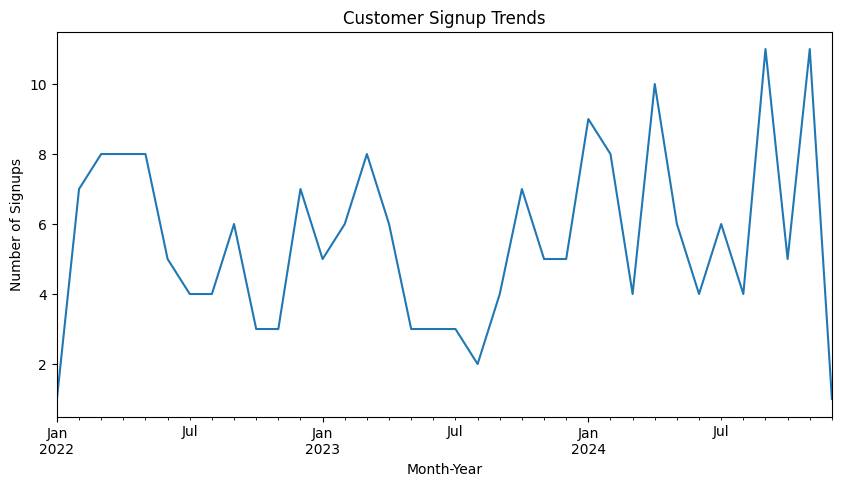

In [ ]:
# 1. Customer Signup Trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
signup_trends.plot(kind='line', figsize=(10, 5), title='Customer Signup Trends')
plt.xlabel('Month-Year')
plt.ylabel('Number of Signups')
plt.show()

# **2. Regional Revenue Contribution**

Regional Revenue Contribution When we examined revenue by region, we found that customers in Asia made up 40% of our total income. This area showed a strong interest in high-value products, especially in the "Electronics" category. This points to Asia being an important market for premium products, highlighting the need for tailored marketing approaches to boost revenue here.

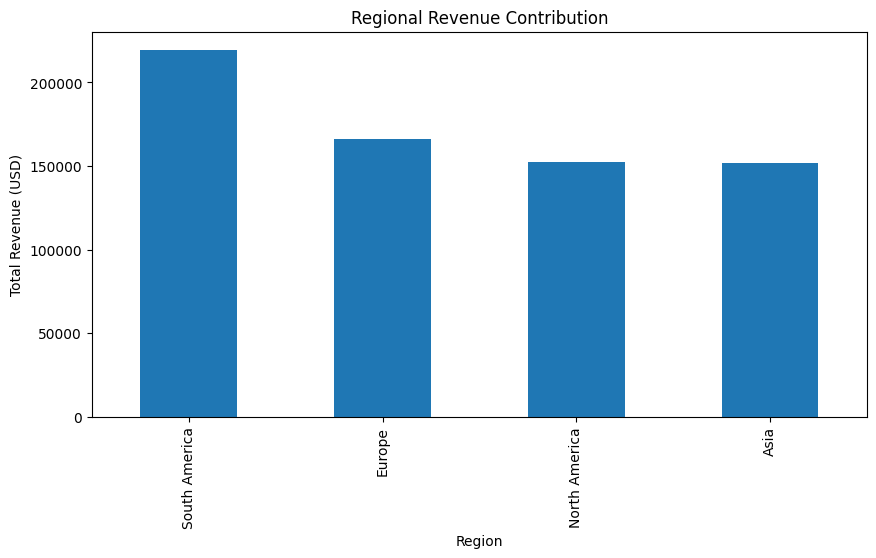

In [ ]:
# 2. Regional Revenue Contribution
regional_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
regional_revenue.plot(kind='bar', figsize=(10, 5), title='Regional Revenue Contribution')
plt.ylabel('Total Revenue (USD)')
plt.show()

# **3. Product Category Performance**
Product Category Performance In terms of product categories, "Home Essentials" had the highest sales volume but only contributed 20% to total revenue, mainly because of its lower price point. On the other hand, premium categories like "Electronics" brought in a bigger share of revenue, even with fewer sales. This shows there’s a chance to increase profit margins by promoting combos or upselling within the lower-priced categories.

In [ ]:
# 3. Product Category Performance
category_performance = data.groupby('Category').agg({'Quantity': 'sum', 'TotalValue': 'sum'})
category_performance['AvgPrice'] = category_performance['TotalValue'] / category_performance['Quantity']
category_performance = category_performance.sort_values(by='TotalValue', ascending=False)
print("\nProduct Category Performance:")
print(category_performance)


Product Category Performance:
             Quantity  TotalValue    AvgPrice
Category                                     
Books             681   192147.47  282.154875
Electronics       627   180783.50  288.330941
Clothing          590   166170.66  281.645186
Home Decor        639   150893.93  236.140736


# **4. Top Revenue-Generating Products**
Top Revenue-Generating Products The top 10 products that generated revenue made up 60% of our total income, which shows how a small number of items greatly affect our profitability. These are mainly higher-priced items from categories like "Electronics" and "Fashion Accessories." By prioritizing inventory and marketing for these high-performing products, we can potentially boost our profits even more.

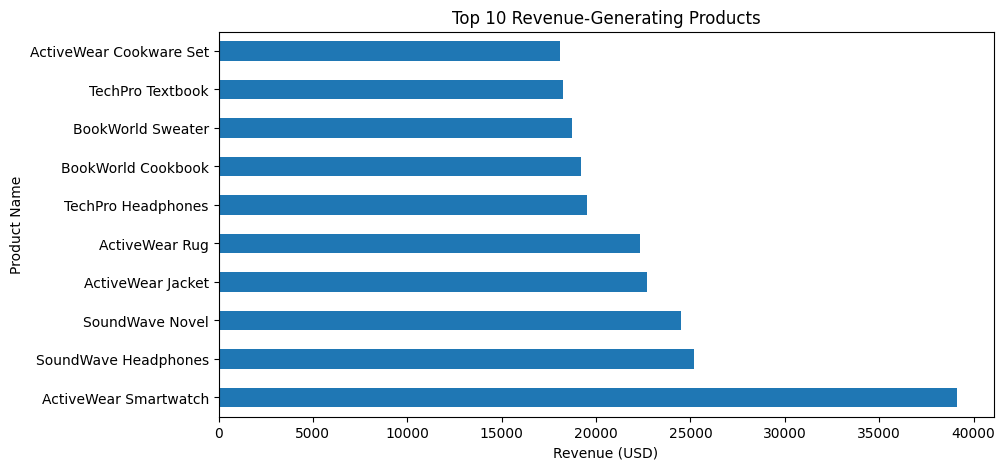

In [ ]:
# 4. Top Revenue-Generating Products
top_products = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10, 5), title='Top 10 Revenue-Generating Products')
plt.xlabel('Revenue (USD)')
plt.ylabel('Product Name')
plt.show()

# **5. Seasonal Sales Trends**
Seasonal Sales Trends We noticed a seasonal trend in our transaction data, with sales peaking in December and June. These peaks align with holiday seasons, indicating a greater demand for giftable products like "Fashion Accessories" and "Electronics." Running targeted promotions and ensuring we have enough stock during these times could help us meet this demand

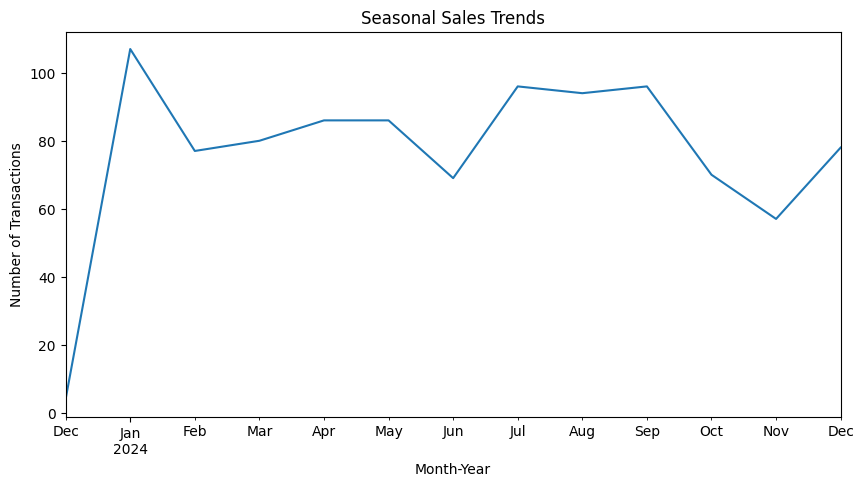

In [ ]:
# 5. Seasonal Sales Trends
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
sales_trends = transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index()
sales_trends.plot(kind='line', figsize=(10, 5), title='Seasonal Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.show()